In [1]:
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
iris.small <- filter(iris, Species %in% c("virginica", "versicolor"))   # 載入資料

In [3]:
glm.out <- glm(Species ~ Sepal.Width + Sepal.Length + Petal.Width + Petal.Length,
               data = iris.small,
               family = binomial)                   # 建立模型


In [4]:
summary(glm.out)


Call:
glm(formula = Species ~ Sepal.Width + Sepal.Length + Petal.Width + 
    Petal.Length, family = binomial, data = iris.small)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.01105  -0.00541  -0.00001   0.00677   1.78065  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)  
(Intercept)   -42.638     25.707  -1.659   0.0972 .
Sepal.Width    -6.681      4.480  -1.491   0.1359  
Sepal.Length   -2.465      2.394  -1.030   0.3032  
Petal.Width    18.286      9.743   1.877   0.0605 .
Petal.Length    9.429      4.737   1.991   0.0465 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 138.629  on 99  degrees of freedom
Residual deviance:  11.899  on 95  degrees of freedom
AIC: 21.899

Number of Fisher Scoring iterations: 10


In [5]:
lr_data <- data.frame(predictor=glm.out$linear.predictors, prob=glm.out$fitted.values, Species=iris.small$Species)

In [6]:
require(ggplot2)

Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


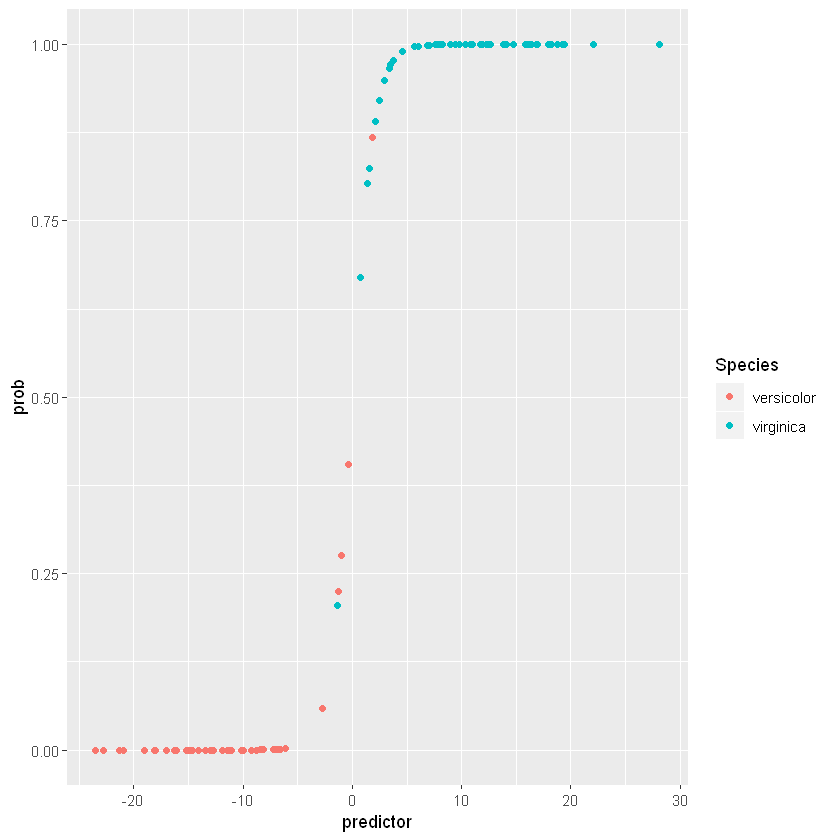

In [7]:
ggplot(lr_data, aes(x=predictor, y=prob, color=Species)) + geom_point()

In [8]:
virg_true <- sum(lr_data$predictor > 0 & lr_data$Species=="virginica") 
virg_false <- sum(lr_data$predictor <= 0 & lr_data$Species=="virginica") 


In [9]:
virg_true

[1] 49

In [10]:
virg_false

[1] 1

In [11]:
tp <- virg_true/(virg_true + virg_false)
tp


[1] 0.98

In [12]:
vers_true <- sum(lr_data$predictor <= 0 & lr_data$Species=="versicolor") 
vers_false <- sum(lr_data$predictor > 0 & lr_data$Species=="versicolor") 


In [13]:
vers_true

[1] 49

In [14]:
vers_false

[1] 1

In [15]:
tn <- vers_true/(vers_true + vers_false)
tn


[1] 0.98

In [ ]:
#透過模型 進行預測

In [17]:
plant1 <- data.frame(Sepal.Length=6.4, Sepal.Width=2.8, Petal.Length=4.6, Petal.Width=1.8)
plant2 <- data.frame(Sepal.Length=6.3, Sepal.Width=2.5, Petal.Length=4.1, Petal.Width=1.7)
plant3 <- data.frame(Sepal.Length=6.7, Sepal.Width=3.3, Petal.Length=5.2, Petal.Width=2.3)


In [18]:
predict(glm.out, plant1, type="response")

1 
0.3033325

In [ ]:
# 0.30 是 virginica   ==> 0.70 是 versicolor

In [19]:
predict(glm.out, plant2, type="response")

1 
0.005916967

In [ ]:
# 0.6% 是 virginica  ==> 0.99.4 是 versicolor

In [20]:
predict(glm.out, plant3, type="response")

1 
0.9999493

In [ ]:
# 99.9949% 是 virginica  